In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Surpress Futurewarnings messages due to seaborn incompatibilities
warnings.filterwarnings("ignore",category=FutureWarning)

1. **Probability and Expected Value**
   - Generate 10,000 random samples of flipping 3 coins (use `np.random.binomial()`)
   - Plot the probability distribution of getting 0, 1, 2, or 3 heads
   - Calculate the expected value (mean) of your distribution
   - Compare your empirical results with the theoretical probability for each outcome

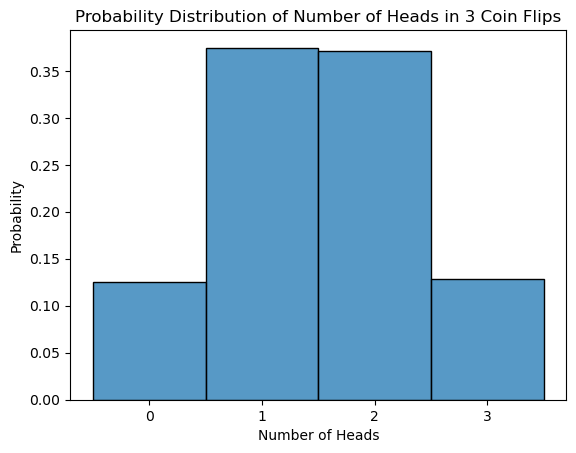

In [7]:
#Generate 10,000 random samples of flipping 3 coins
samples = np.random.binomial(n=3, p=0.5, size=10000)
#Plot the probability distribution of getting 0, 1, 2, or 3 heads
sns.histplot(
    samples,
    discrete=True,
    stat='probability'
)

plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.title('Probability Distribution of Number of Heads in 3 Coin Flips')
plt.xticks([0, 1, 2, 3])
plt.show()

In [8]:
#Calculate the expected value (mean) of your distribution
expected_value = np.mean(samples)
print(f'Expected Value (Mean) of Number of Heads: {expected_value}')

Expected Value (Mean) of Number of Heads: 1.5028


In [10]:
# Compare your empirical results with the theoretical probability for each outcome
## Theoretical probabilities (what should happen)
k = [0, 1, 2, 3]          # 0, 1, 2, 3 heads
theoretical_probs = st.binom.pmf(k, n=3, p=0.5) # Probability Mass Function
## Empirical probabilities (what actually happened)
empirical_probs = [
    np.mean(samples == 0),
    np.mean(samples == 1),
    np.mean(samples == 2),
    np.mean(samples == 3)
]
print("Theoretical Probabilities:", theoretical_probs)
print("Empirical Probabilities:", empirical_probs)

Theoretical Probabilities: [0.125 0.375 0.375 0.125]
Empirical Probabilities: [0.1258, 0.3746, 0.3706, 0.129]


2. **Normal Distribution and Statistical Testing**

   - Generate two samples from normal distributions:
     - Sample A: 100 values with mean=70, std=5
     - Sample B: 100 values with mean=73, std=5
   - Create a box plot comparing the two distributions
   - Conduct an independent t-test to determine if the means are significantly different
   - Calculate and visualize the 95% confidence intervals for both samples

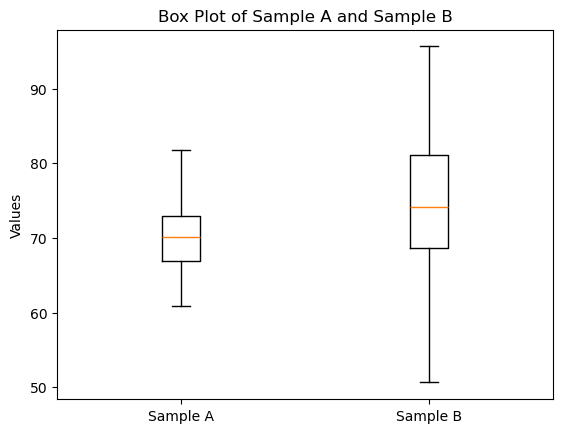

T-test statistic: -4.3649, P-value: 0.000020
Reject the null hypothesis: The means are significantly different.


In [13]:
sample_A = np.random.normal(loc=70, scale=5, size=100)  # Mean=70, SD=5
sample_B = np.random.normal(loc=73, scale=10, size=100)  # Mean=73, SD=10
# Create a box plot comparing the two distributions
import matplotlib.pyplot as plt
plt.boxplot([sample_A, sample_B], labels=['Sample A', 'Sample B'])
plt.title('Box Plot of Sample A and Sample B')
plt.ylabel('Values')
plt.show()
# Perform a two-sample t-test
t_stat, p_value = st.ttest_ind(sample_A, sample_B)
print(f'T-test statistic: {t_stat:.4f}, P-value: {p_value:.6f}')
if p_value < 0.05:
    print("Reject the null hypothesis: The means are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between means.")   

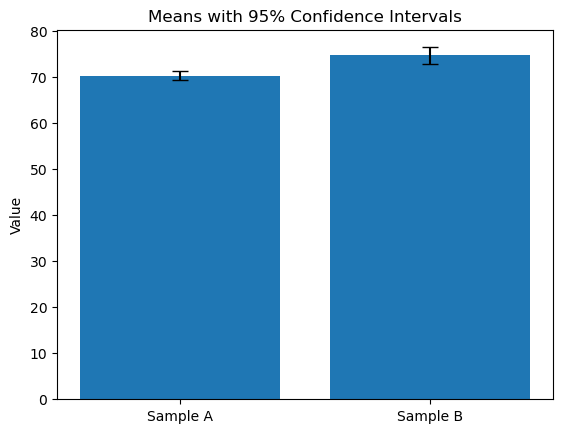

In [16]:
mean_A = np.mean(sample_A)
mean_B = np.mean(sample_B)
ci_A = st.t.interval(0.95, len(sample_A)-1,
                     loc=mean_A,
                     scale=st.sem(sample_A))

ci_B = st.t.interval(0.95, len(sample_B)-1,
                     loc=mean_B,
                     scale=st.sem(sample_B))

means = [mean_A, mean_B]
errors = [
    mean_A - ci_A[0],
    mean_B - ci_B[0]
]

plt.figure()
plt.bar(['Sample A', 'Sample B'], means, yerr=errors, capsize=6)
plt.ylabel('Value')
plt.title('Means with 95% Confidence Intervals')
plt.show()


The plot shows that Sample B has a higher mean than Sample A. The 95% confidence intervals for the two means show little to no overlap, indicating that the difference in means is statistically significant. This result supports the conclusion from the independent t-test that the two population means are different.